## Importing and Installing Libraries

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
url = "https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction"
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhruvyadav89300
Your Kaggle Key: ··········


100%|██████████| 8.56k/8.56k [00:00<00:00, 4.08MB/s]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



---



---



## Exploratory Data Analysis

### Attribute Information

| Attribute       | Description                                                |
|-----------------|------------------------------------------------------------|
| Age             | Age of the patient [years]                                |
| Sex             | Sex of the patient [M: Male, F: Female]                   |
| ChestPainType   | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| RestingBP       | Resting blood pressure [mm Hg]                            |
| Cholesterol     | Serum cholesterol [mm/dl]                                 |
| FastingBS       | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] |
| RestingECG      | Resting electrocardiogram results [Normal: Normal, ST: ST-T wave abnormality, LVH: Left ventricular hypertrophy] |
| MaxHR           | Maximum heart rate achieved [Numeric value between 60 and 202] |
| ExerciseAngina  | Exercise-induced angina [Y: Yes, N: No]                  |
| Oldpeak         | Oldpeak = ST [Numeric value measured in depression]      |
| ST_Slope        | Slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] |
| HeartDisease    | Output class [1: heart disease, 0: Normal]              |


In [4]:
df = pd.read_csv("/content/heart-failure-prediction/heart.csv")

In [5]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

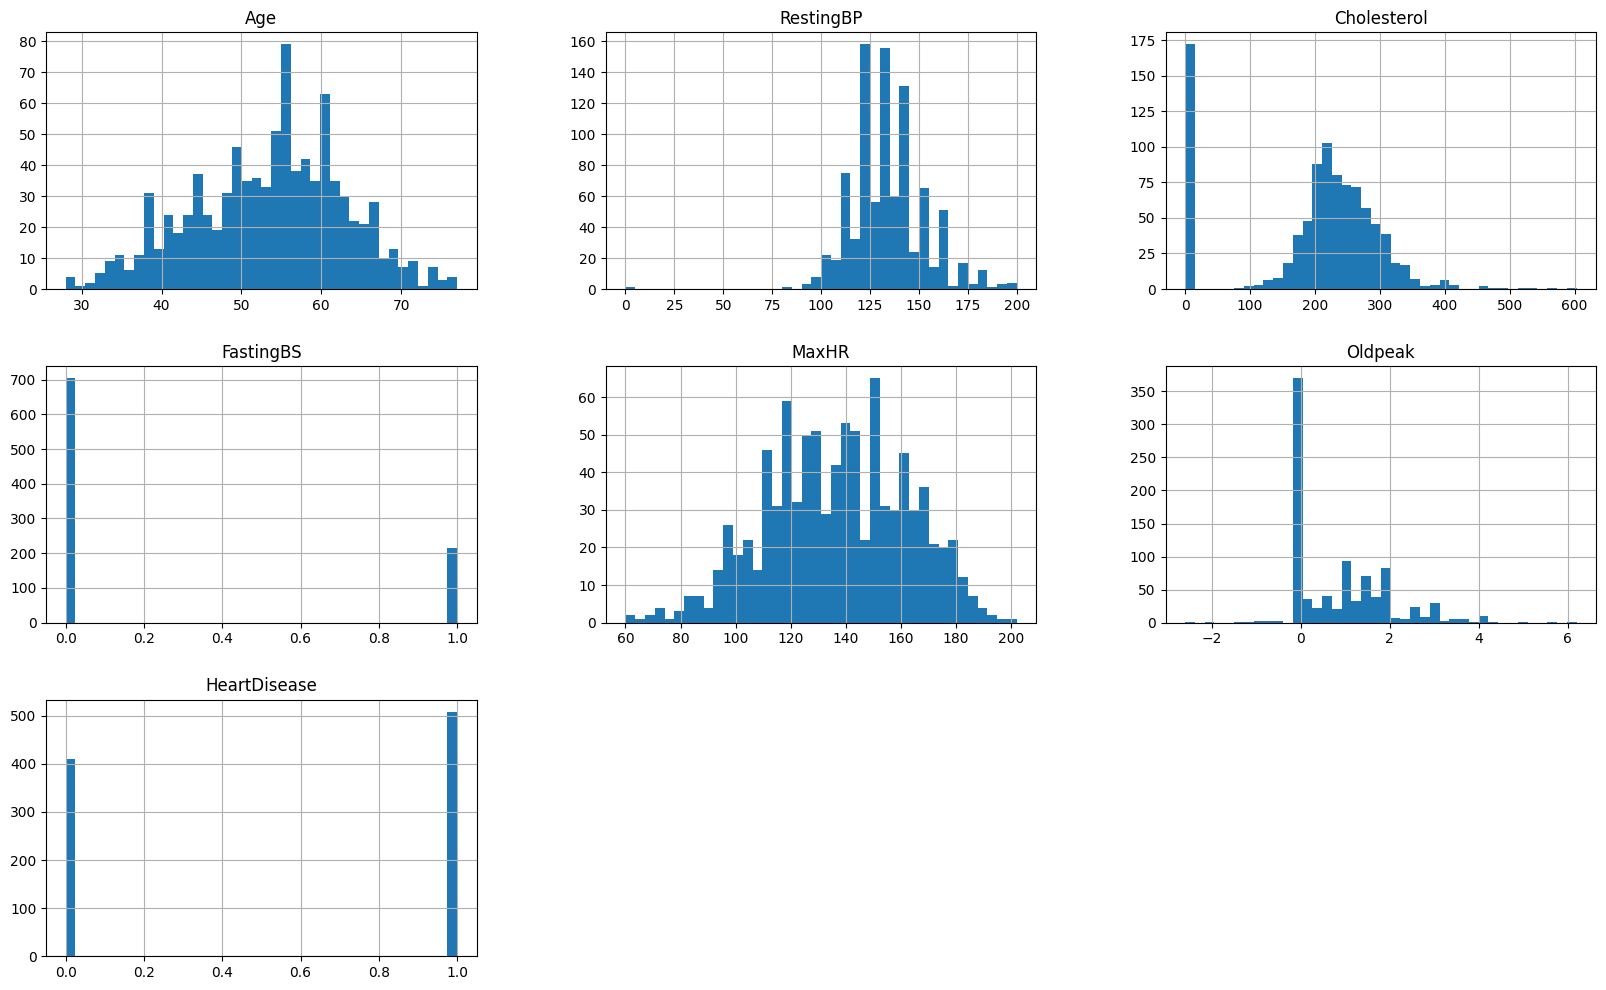

In [9]:
df.hist(figsize=(20,12), bins=40)

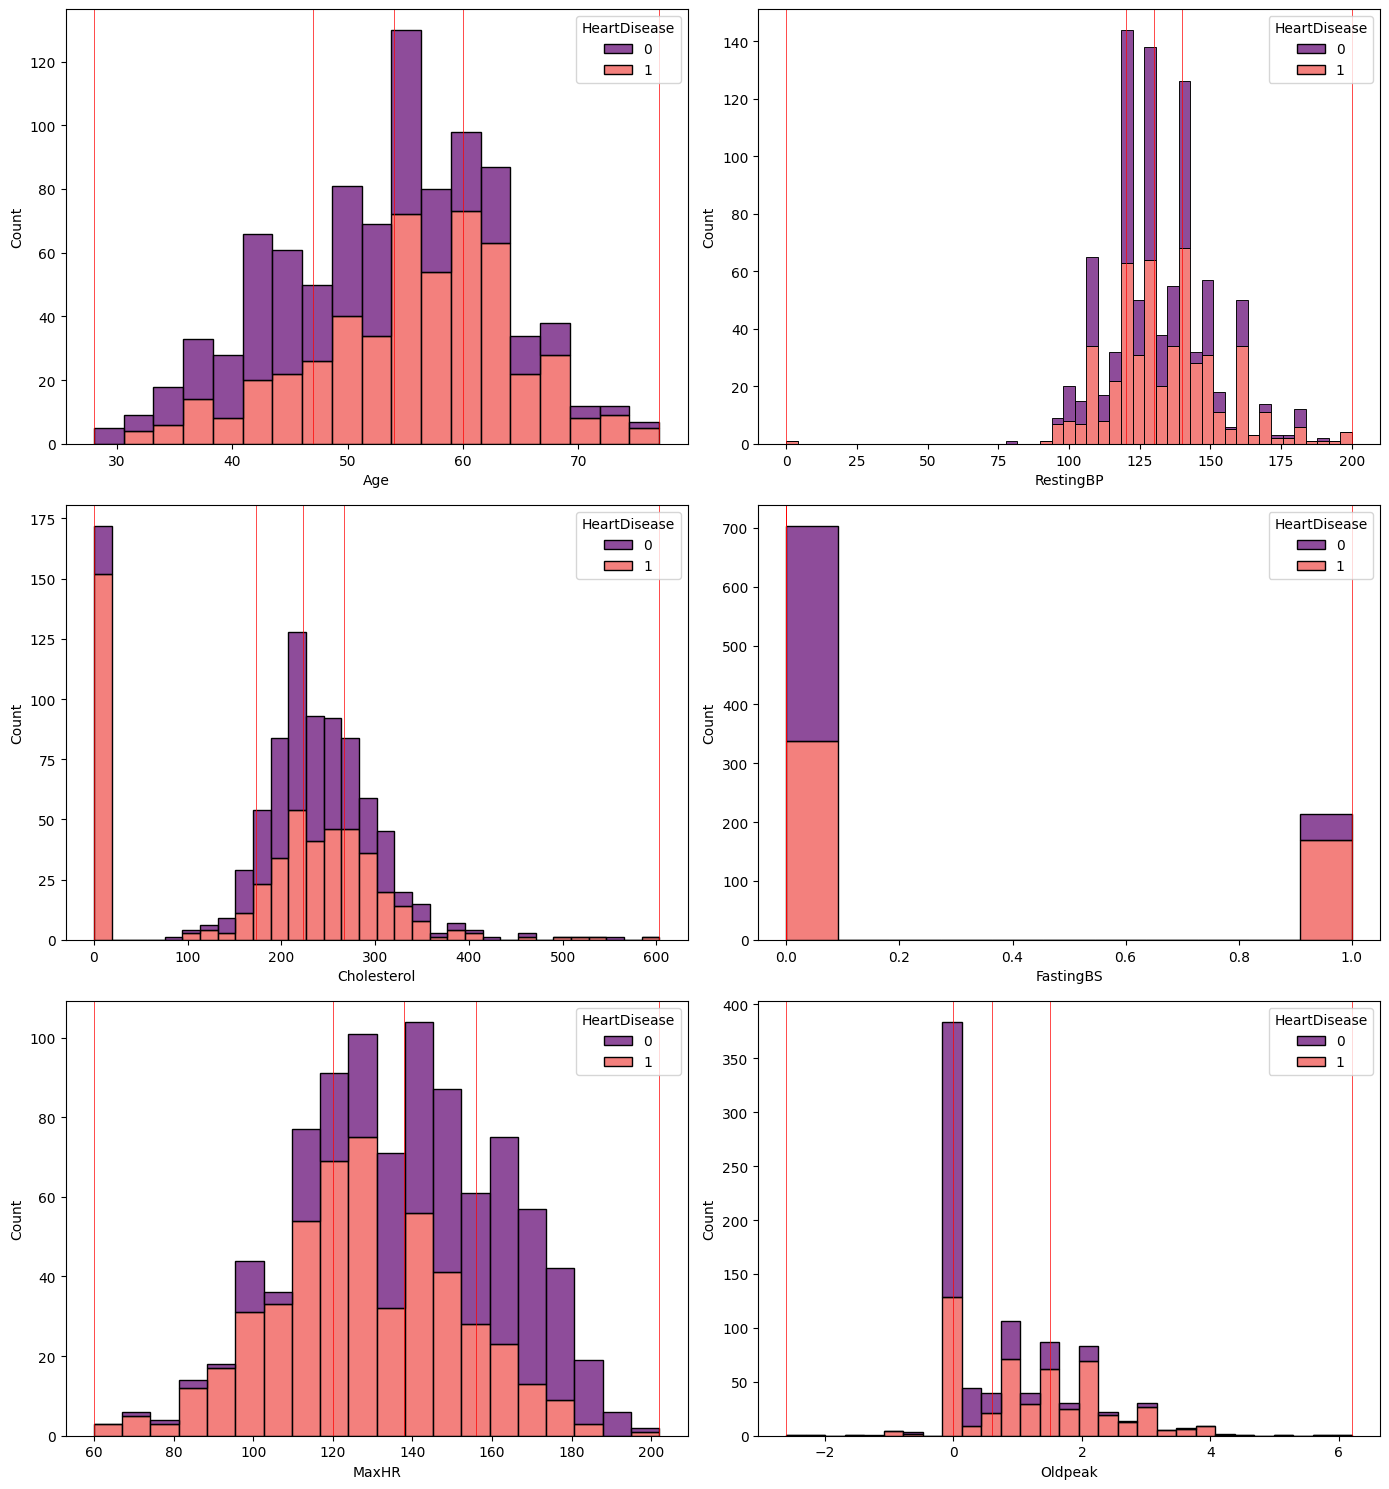

In [10]:
num = df.select_dtypes(include="number")
fig, ax = plt.subplots(3, 2, figsize = (14, 15))
for indx, (column, axes) in list(enumerate(list(zip(num, ax.flatten())))):

    sns.histplot(ax = axes, x = df[column],hue = df['HeartDisease'],
                    palette = 'magma', alpha = 0.8, multiple = 'stack')

    legend = axes.get_legend()
    handles = legend.legend_handles
    legend.remove()
    axes.legend(handles, ['0', '1'], title = 'HeartDisease', loc = 'upper right')
    Quantiles = np.quantile(df[column], [0, 0.25, 0.50, 0.75, 1])

    for q in Quantiles: axes.axvline(x = q, linewidth = 0.5, color = 'r')
plt.tight_layout()
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

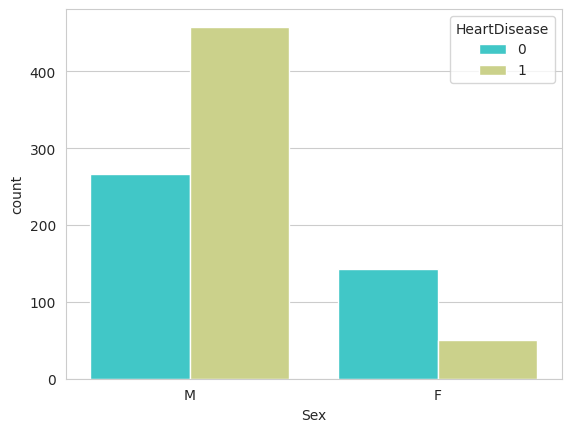

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='HeartDisease',data=df,palette='rainbow')

<Axes: xlabel='Sex', ylabel='Cholesterol'>

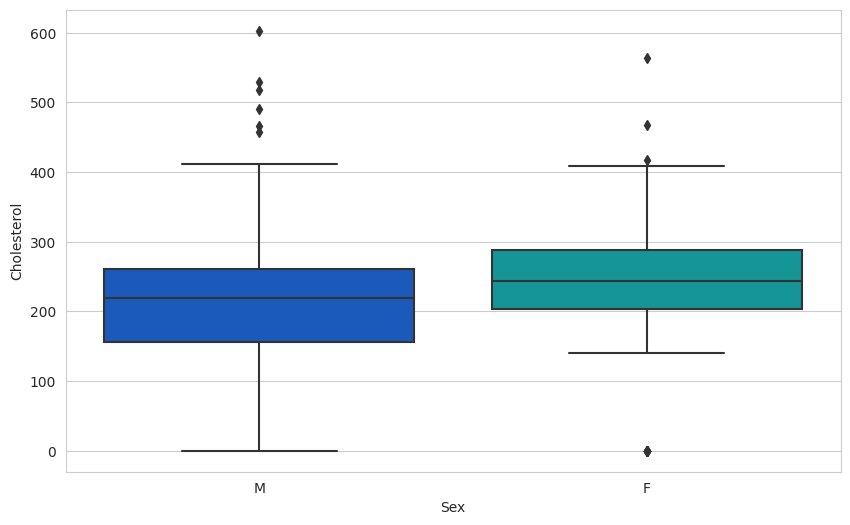

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Cholesterol',x='Sex',data=df,palette='winter')

<ipython-input-13-afbea617acb0>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

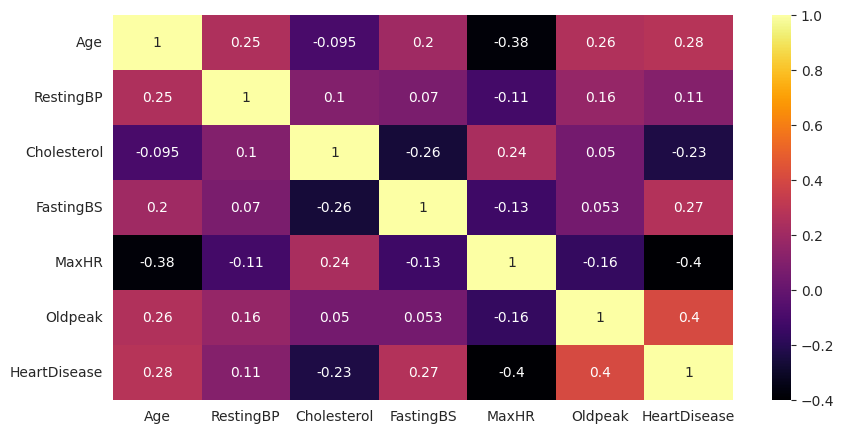

In [13]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='inferno')

1. AGE

In [14]:
df["Age"]

0      40
1      49
2      37
3      48
4      54
       ..
913    45
914    68
915    57
916    57
917    38
Name: Age, Length: 918, dtype: int64

[Text(0.5, 0, 'Age of People'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of Age Groups in the Dataset')]

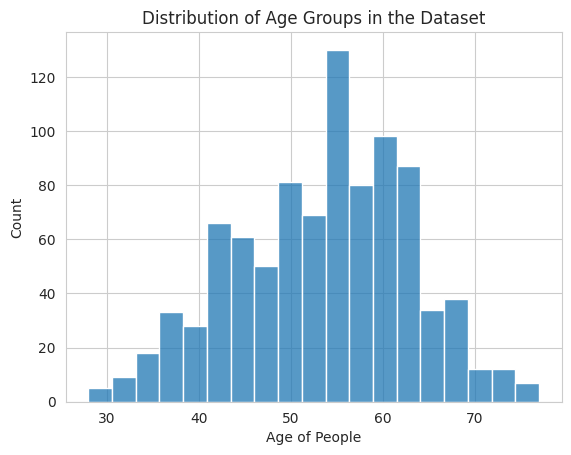

In [15]:
sns.histplot(df["Age"]).set(xlabel="Age of People", ylabel="Count", title="Distribution of Age Groups in the Dataset")

In [16]:
heart_failed_ages = df.query("HeartDisease == 1")["Age"]

In [17]:
len(heart_failed_ages)

508

[Text(0.5, 0, 'Ages of People'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of Age Groups with Heart Conditions')]

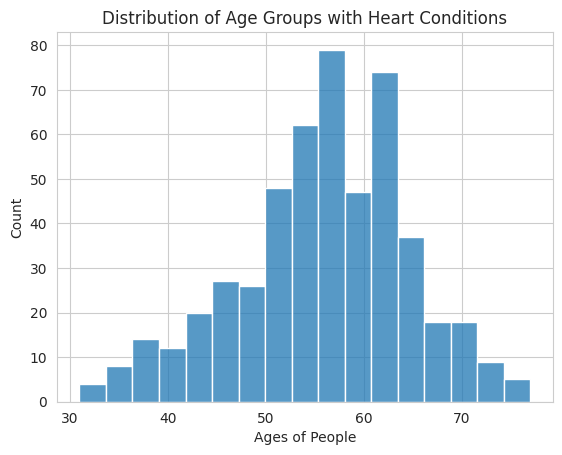

In [18]:
sns.histplot(heart_failed_ages).set(xlabel="Ages of People", ylabel="Count", title="Distribution of Age Groups with Heart Conditions")

2. Sex

In [19]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [20]:
total_people_with_heart_disease = len(df[df.HeartDisease == 1])
total_people_with_heart_disease

508

In [21]:
no_of_males = len(df[(df.Sex == "M") & (df.HeartDisease == 1)])
no_of_males

458

In [22]:
no_of_females = len(df[(df.Sex == "F") & (df.HeartDisease == 1)])
no_of_females

50

In [23]:
percentage_of_males_with_heart_disease = (no_of_males/total_people_with_heart_disease)*100
percentage_of_females_with_heart_disease = (no_of_females/total_people_with_heart_disease)*100

In [24]:
percentage_of_males_with_heart_disease

90.15748031496062

In [25]:
percentage_of_females_with_heart_disease

9.84251968503937

In [26]:
male_percentage_among_healthy_individuals = (no_of_males/725)*100
female_percentage_among_healthy_individuals = (no_of_females/193)*100

In [27]:
male_percentage_among_healthy_individuals

63.172413793103445

In [28]:
female_percentage_among_healthy_individuals

25.906735751295333

## Data Preprocessing

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [30]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
cat_columns = [x for x in df.columns if df[x].dtype == 'object']
cat_columns

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [32]:
df = pd.get_dummies(data=df, prefix = cat_columns, columns = cat_columns)

In [33]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [34]:
X = df.drop(['HeartDisease'], axis = 1 )
Y = df['HeartDisease']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.2, random_state=55)

In [35]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


## Model

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
lr.score(X_train, y_train)

0.8705722070844687

In [39]:
lr.score(X_val, y_val)

0.875

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
dt.score(X_train, y_train)

1.0

In [43]:
dt.score(X_val, y_val)

0.8097826086956522

In [44]:
plt.figure(figsize=(120, 100))
plot_tree(dt, feature_names = X.columns, filled=True)

[Text(0.6074420103092784, 0.9705882352941176, 'ST_Slope_Up <= 0.5\ngini = 0.495\nsamples = 734\nvalue = [329, 405]'),
 Text(0.4262242268041237, 0.9117647058823529, 'MaxHR <= 150.5\ngini = 0.299\nsamples = 420\nvalue = [77, 343]'),
 Text(0.28286082474226804, 0.8529411764705882, 'Sex_F <= 0.5\ngini = 0.223\nsamples = 345\nvalue = [44, 301]'),
 Text(0.18427835051546393, 0.7941176470588235, 'ChestPainType_ASY <= 0.5\ngini = 0.167\nsamples = 305\nvalue = [28, 277]'),
 Text(0.13144329896907217, 0.7352941176470589, 'MaxHR <= 130.5\ngini = 0.317\nsamples = 76\nvalue = [15, 61]'),
 Text(0.07731958762886598, 0.6764705882352942, 'RestingBP <= 130.5\ngini = 0.201\nsamples = 44\nvalue = [5, 39]'),
 Text(0.05154639175257732, 0.6176470588235294, 'RestingBP <= 128.0\ngini = 0.32\nsamples = 20\nvalue = [4, 16]'),
 Text(0.030927835051546393, 0.5588235294117647, 'MaxHR <= 100.5\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(0.020618556701030927, 0.5, 'RestingBP <= 115.0\ngini = 0.408\nsamples = 7\

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_val, dt_classifier.predict(X_val)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_val, dt_classifier.predict(X_val)))

In [47]:
evaluate_model(dt)

Train Accuracy : 1.0
Train Confusion Matrix:
[[329   0]
 [  0 405]]
--------------------------------------------------
Test Accuracy : 0.8097826086956522
Test Confusion Matrix:
[[67 14]
 [21 82]]


In [48]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [30, 32, 34, 36, 38, 40],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [49]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': [30, 32, 34, 36, 38, 40]},
             scoring='accuracy', verbose=1)

In [50]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=32)

In [51]:
dt_best = grid_search.best_estimator_

In [52]:
evaluate_model(dt_best)

Train Accuracy : 0.8528610354223434
Train Confusion Matrix:
[[270  59]
 [ 49 356]]
--------------------------------------------------
Test Accuracy : 0.8641304347826086
Test Confusion Matrix:
[[69 12]
 [13 90]]


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rcf = RandomForestClassifier()

In [55]:
rcf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
rcf.score(X_train, y_train)

1.0

In [57]:
rcf.score(X_val, y_val)

0.907608695652174

In [58]:
rcf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [59]:
params_rf = {
    'min_samples_leaf': [30, 32, 34, 36, 38, 40],
    'n_estimators': [10, 20, 30, 40],
    'max_features': [10, 20, 30],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [0, 1, 2, 3, 4],
    'criterion' : ["gini", "entropy"]
}
grid_search_rf = GridSearchCV(estimator=rcf, param_grid=params_rf, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [60]:
grid_search_rf.fit(X_train, y_train)

Fitting 4 folds for each of 1920 candidates, totalling 7680 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


1536 fits failed out of a total of 7680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1536 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklear

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40],
                         'max_features': [10, 20, 30],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40]},
             scoring='accuracy', verbose=1)

In [61]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 40}

In [62]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=3,
                       n_estimators=40)

In [63]:
best_rcf = grid_search_rf.best_estimator_

In [64]:
evaluate_model(best_rcf)

Train Accuracy : 0.944141689373297
Train Confusion Matrix:
[[300  29]
 [ 12 393]]
--------------------------------------------------
Test Accuracy : 0.8858695652173914
Test Confusion Matrix:
[[70 11]
 [10 93]]


In [65]:
import xgboost as xgb

In [66]:
xgbcf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=10)

In [67]:
xgbcf.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-logloss:0.53662
[1]	validation_0-logloss:0.45134
[2]	validation_0-logloss:0.39596
[3]	validation_0-logloss:0.36761
[4]	validation_0-logloss:0.34303
[5]	validation_0-logloss:0.33078
[6]	validation_0-logloss:0.31828
[7]	validation_0-logloss:0.31451
[8]	validation_0-logloss:0.31218
[9]	validation_0-logloss:0.31072
[10]	validation_0-logloss:0.31014
[11]	validation_0-logloss:0.30943
[12]	validation_0-logloss:0.31598
[13]	validation_0-logloss:0.31903
[14]	validation_0-logloss:0.31792
[15]	validation_0-logloss:0.31906
[16]	validation_0-logloss:0.32097
[17]	validation_0-logloss:0.32320
[18]	validation_0-logloss:0.32339
[19]	validation_0-logloss:0.31964
[20]	validation_0-logloss:0.32215


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
xgbcf.score(X_train, y_train)

0.9604904632152589

In [69]:
xgbcf.score(X_val, y_val)

0.8967391304347826